In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
la = pd.read_csv("../data/dataset_LA.csv")

In [3]:
la.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20200820033927,2020-08-21,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,344,https://www.airbnb.com/rooms/344,20200820033927,2020-08-22,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,Quiet-yet-close to all the fun in LA! Hollywoo...,https://a0.muscache.com/pictures/cc4b724d-db8b...,767,https://www.airbnb.com/users/show/767,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.16
2,2708,https://www.airbnb.com/rooms/2708,20200820033927,2020-08-20,Beautiful Furnish Mirrored Mini-Suite w/ Firep...,Beau Furn Mirror Mini-Suite w/ Fireplace 28% o...,We are minutes away from the Mentor Language I...,https://a0.muscache.com/pictures/40618141/2ac0...,3008,https://www.airbnb.com/users/show/3008,...,10.0,10.0,10.0,NaN,t,2,0,2,0,0.34
3,2732,https://www.airbnb.com/rooms/2732,20200820033927,2020-08-20,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,9.0,10.0,9.0,228269,f,2,1,1,0,0.19
4,2864,https://www.airbnb.com/rooms/2864,20200820033927,2020-08-20,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,https://www.airbnb.com/users/show/3207,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [4]:
la.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

## Data Cleaning

Kevin : host response time, host response rate, host_acceptacne, host neighborhood_cleansed, host neighborhood matches?, property_type, room_type⁣
⁣maximum_nights, minimum_nights, number of reviews, number of reviews l30d, last review (count date from now), reviews per month

### Host Response Time

In [5]:
la["host_response_time"].unique()

array([nan, 'within a day', 'within an hour', 'within a few hours',
       'a few days or more'], dtype=object)

nan, 'within a day', 'within an hour', 'within a few hours','a few days or more'

In [6]:
la["host_response_time"].value_counts()

within an hour        15487
within a few hours     4451
within a day           2553
a few days or more     1229
Name: host_response_time, dtype: int64

In [7]:
na_count = la[la["host_response_time"].isna()].shape[0]

In [8]:
na_count / la.shape[0]

0.2829070681419675

9358 rows with NA for host_response_time; 28% of data

### Host Response Rate

In [9]:
la["host_response_rate"].unique()

array([nan, '70%', '100%', '93%', '86%', '63%', '99%', '54%', '97%',
       '43%', '71%', '50%', '90%', '92%', '0%', '80%', '60%', '83%',
       '88%', '72%', '94%', '75%', '13%', '89%', '98%', '17%', '40%',
       '33%', '96%', '77%', '85%', '91%', '95%', '78%', '25%', '66%',
       '84%', '64%', '82%', '67%', '37%', '73%', '87%', '59%', '10%',
       '39%', '38%', '30%', '44%', '23%', '48%', '45%', '69%', '47%',
       '29%', '57%', '56%', '22%', '20%', '65%', '58%', '31%', '14%',
       '79%', '61%', '81%', '11%', '76%', '42%', '62%', '36%', '51%',
       '74%', '55%', '68%', '4%', '53%', '46%', '8%'], dtype=object)

In [10]:
na_count = la[la["host_response_rate"].isna()].shape[0]

In [11]:
na_count / la.shape[0]

0.2829070681419675

9358 rows with NA for host_response_rate; 28% of data

In [12]:
la["host_response_rate"] = la["host_response_rate"].str.replace("%", "").astype(float)

In [13]:
la["host_response_rate"] = la["host_response_rate"] / 100

In [14]:
la["host_response_rate"]

0         NaN
1        0.70
2        1.00
3        0.93
4         NaN
         ... 
33073     NaN
33074    1.00
33075    1.00
33076     NaN
33077    1.00
Name: host_response_rate, Length: 33078, dtype: float64

### Host Acceptance Rate

In [15]:
la["host_acceptance_rate"].unique()

array(['0%', '36%', '100%', '57%', nan, '95%', '93%', '99%', '84%', '98%',
       '47%', '75%', '74%', '83%', '82%', '91%', '24%', '97%', '86%',
       '70%', '25%', '62%', '50%', '33%', '96%', '71%', '89%', '13%',
       '44%', '85%', '90%', '58%', '30%', '65%', '54%', '63%', '73%',
       '78%', '67%', '68%', '79%', '94%', '60%', '29%', '43%', '46%',
       '55%', '10%', '80%', '56%', '92%', '40%', '87%', '14%', '11%',
       '18%', '59%', '76%', '81%', '16%', '77%', '38%', '52%', '27%',
       '64%', '9%', '66%', '88%', '8%', '69%', '72%', '49%', '32%', '20%',
       '17%', '22%', '15%', '53%', '39%', '61%', '19%', '23%', '48%',
       '45%', '26%', '21%', '41%', '12%', '2%', '51%', '42%', '35%',
       '31%', '7%', '37%', '5%', '28%', '6%', '3%', '34%'], dtype=object)

In [16]:
na_count = la[la["host_acceptance_rate"].isna()].shape[0]
na_count

6727

In [17]:
na_count / la.shape[0]

0.20336779732752888

6727 rows with NA for host_acceptance_rate; 20% of data

In [18]:
la["host_acceptance_rate"] = la["host_acceptance_rate"].str.replace("%", "").astype(float)

In [19]:
la["host_acceptance_rate"] = la["host_acceptance_rate"] / 100

In [20]:
la["host_acceptance_rate"]

0        0.00
1        0.36
2        1.00
3        0.57
4         NaN
         ... 
33073     NaN
33074    0.93
33075    1.00
33076     NaN
33077    0.98
Name: host_acceptance_rate, Length: 33078, dtype: float64

### Neighbourhood Cleansed

In [21]:
la["neighbourhood_cleansed"].value_counts()

Venice                       1701
Hollywood                    1616
Long Beach                   1573
Santa Monica                 1184
Downtown                     1072
                             ... 
Hawaiian Gardens                1
Northwest Antelope Valley       1
Ridge Route                     1
South Diamond Bar               1
Lake Hughes                     1
Name: neighbourhood_cleansed, Length: 264, dtype: int64

In [22]:
len(la["neighbourhood_cleansed"].unique())

264

### Host Neighbourhood match Neighborhood Cleansed

In [23]:
la["host_neighbourhood"].unique()

array(['Culver City', 'Burbank', 'Hollywood', 'Santa Monica',
       'Bellflower', 'Del Rey', 'Woodland Hills/Warner Center',
       'Atwater Village', 'Venice', 'Long Beach', 'Redondo Beach',
       'Mid-Wilshire', 'Hollywood Hills', 'Torrance', 'Mid-City',
       'Valley Village', 'Silver Lake', 'Glendale', 'Highland Park',
       'Mount Washington', 'West Los Angeles', 'Westside', 'Los Feliz',
       'Tarzana', 'Mar Vista', 'Malibu', 'Laurel Canyon',
       'South Robertson', nan, 'Van Nuys', 'Glassell Park', 'Lynwood',
       'Granada Hills North', 'Beverly Hills', 'Echo Park', 'Brentwood',
       'West Hollywood', 'Encino', 'Cerritos', 'South LA',
       'North Hills East', 'Sunland/Tujunga', 'Westchester/Playa Del Rey',
       'Westlake', 'Carson', 'North Hollywood', 'Altadena',
       'Pacific Palisades', 'Topanga', 'Valley Glen', 'Manhattan Beach',
       'Studio City', 'Marina Del Rey', 'Palms', 'Cahuenga Pass',
       'Sun Valley', 'Lakewood', 'San Pedro', 'Downtown Toronto',

In [24]:
la["neighborhood_matched"] = la["host_neighbourhood"] == la["neighbourhood_cleansed"]

In [25]:
la[la["neighborhood_matched"] == True].shape[0]

16493

In [26]:
la[la["neighborhood_matched"] == False].shape[0]

16585

### Property Type

In [27]:
la["property_type"].unique()

array(['Entire condominium', 'Entire house', 'Private room in apartment',
       'Entire apartment', 'Private room in tiny house',
       'Private room in guesthouse', 'Entire bungalow',
       'Private room in house', 'Entire guesthouse',
       'Private room in loft', 'Entire guest suite',
       'Private room in townhouse', 'Private room in island',
       'Entire townhouse', 'Private room in bed and breakfast',
       'Private room in hostel', 'Room in hotel',
       'Private room in bungalow', 'Entire villa', 'Entire cottage',
       'Entire cabin', 'Private room in villa',
       'Private room in farm stay', 'Entire loft', 'Shared room in house',
       'Shared room in hostel', 'Shared room in villa', 'Camper/RV',
       'Farm stay', 'Private room in condominium',
       'Private room in guest suite', 'Entire place',
       'Room in aparthotel', 'Private room in treehouse', 'Treehouse',
       'Shared room in apartment', 'Private room',
       'Private room in castle', 'Barn', 'Y

### Room Type

In [28]:
la["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [29]:
na_count = la[la["room_type"].isna()].shape[0]
na_count

0

In [30]:
la["room_type"].value_counts()

Entire home/apt    20989
Private room       10769
Shared room         1163
Hotel room           157
Name: room_type, dtype: int64

### Maximum Nights

In [31]:
la["maximum_nights"].unique().shape[0]

266

In [32]:
na_count = la[la["maximum_nights"].isna()].shape[0]
na_count

0

In [33]:
la["maximum_nights"].value_counts()

1125    17037
30       2056
365      1740
90       1414
28       1051
        ...  
371         1
2500        1
275         1
51          1
991         1
Name: maximum_nights, Length: 266, dtype: int64

In [34]:
max(la["maximum_nights"])

10000

In [35]:
min(la["maximum_nights"])

1

(array([1.5710e+04, 1.7359e+04, 5.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.0000e+00, 1.0009e+03, 2.0008e+03, 3.0007e+03, 4.0006e+03,
        5.0005e+03, 6.0004e+03, 7.0003e+03, 8.0002e+03, 9.0001e+03,
        1.0000e+04]),
 <a list of 10 Patch objects>)

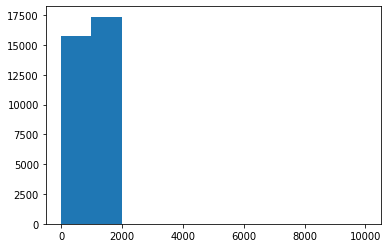

In [36]:
plt.hist(la["maximum_nights"])

### Minimum Nights

In [37]:
la["minimum_nights"].unique().shape[0]

97

In [38]:
na_count = la[la["minimum_nights"].isna()].shape[0]
na_count

0

In [39]:
la["minimum_nights"].value_counts()

1      8549
30     7974
2      6162
3      3469
31     2023
       ... 
113       1
122       1
730       1
70        1
63        1
Name: minimum_nights, Length: 97, dtype: int64

In [40]:
max(la["minimum_nights"])

1125

In [41]:
min(la["minimum_nights"])

1

### Number of Reviews

In [42]:
la["number_of_reviews"].value_counts()

0      7118
1      2814
2      1798
3      1342
4      1069
       ... 
519       1
324       1
388       1
420       1
543       1
Name: number_of_reviews, Length: 491, dtype: int64

7118 has 0 reviews

### Number of Reviews Last 30 days

In [43]:
la["number_of_reviews_l30d"].unique()

array([ 0,  1,  2,  6,  9,  3,  5,  8,  4,  7, 16, 11, 10, 14, 12, 15, 13,
       22, 18, 25])

In [44]:
la["number_of_reviews_l30d"].value_counts()

0     25720
1      3088
2      1461
3      1003
4       707
5       408
6       248
7       172
8       104
9        58
10       42
11       25
12       17
14        8
15        7
13        5
18        2
22        1
16        1
25        1
Name: number_of_reviews_l30d, dtype: int64

25720 has 0 reviews last 30 days

In [45]:
data = la[["host_response_time", "host_response_rate", "host_acceptance_rate", "neighbourhood_cleansed", "neighborhood_matched", "property_type", "room_type", "maximum_nights", "minimum_nights", "number_of_reviews","number_of_reviews_l30d"]]  

In [46]:
data.head()

,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighborhood_matched,property_type,room_type,maximum_nights,minimum_nights,number_of_reviews,number_of_reviews_l30d
0,NaN,NaN,0.00,Culver City,True,Entire condominium,Entire home/apt,730,30,2,0
1,within a day,0.70,0.36,Burbank,True,Entire house,Entire home/apt,14,2,8,0
2,within an hour,1.00,1.00,Hollywood,True,Private room in apartment,Private room,366,30,26,1
3,within a few hours,0.93,0.57,Santa Monica,True,Private room in apartment,Private room,180,1,21,0
4,NaN,NaN,NaN,Bellflower,True,Entire apartment,Entire home/apt,730,30,0,0


In [47]:
data["property_type"].unique()

array(['Entire condominium', 'Entire house', 'Private room in apartment',
       'Entire apartment', 'Private room in tiny house',
       'Private room in guesthouse', 'Entire bungalow',
       'Private room in house', 'Entire guesthouse',
       'Private room in loft', 'Entire guest suite',
       'Private room in townhouse', 'Private room in island',
       'Entire townhouse', 'Private room in bed and breakfast',
       'Private room in hostel', 'Room in hotel',
       'Private room in bungalow', 'Entire villa', 'Entire cottage',
       'Entire cabin', 'Private room in villa',
       'Private room in farm stay', 'Entire loft', 'Shared room in house',
       'Shared room in hostel', 'Shared room in villa', 'Camper/RV',
       'Farm stay', 'Private room in condominium',
       'Private room in guest suite', 'Entire place',
       'Room in aparthotel', 'Private room in treehouse', 'Treehouse',
       'Shared room in apartment', 'Private room',
       'Private room in castle', 'Barn', 'Y

In [48]:
def property_cleansing(text):
    if text.startswith("Private"):
        return "Private room"
    elif text.startswith("Shared"):
        return "Shared room"
    elif text.startswith("Entire"):
        return "Entire house"
    elif text.startswith("Room"):
        return "Private room"
    else:
        return text

In [49]:
data["property_type"] = data["property_type"].apply(property_cleansing)

/opt/anaconda3/envs/jaeyoung/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
data["property_type"].unique()

array(['Entire house', 'Private room', 'Shared room', 'Camper/RV',
       'Farm stay', 'Treehouse', 'Barn', 'Yurt', 'Boat', 'Tiny house',
       'Dome house', 'Tipi', 'Campsite', 'Earth house', 'Castle', 'Train',
       'Tent', 'Bus', 'Cave', 'Lighthouse', 'Hut', 'Houseboat'],
      dtype=object)

In [51]:
data.head()

,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighborhood_matched,property_type,room_type,maximum_nights,minimum_nights,number_of_reviews,number_of_reviews_l30d
0,NaN,NaN,0.00,Culver City,True,Entire house,Entire home/apt,730,30,2,0
1,within a day,0.70,0.36,Burbank,True,Entire house,Entire home/apt,14,2,8,0
2,within an hour,1.00,1.00,Hollywood,True,Private room,Private room,366,30,26,1
3,within a few hours,0.93,0.57,Santa Monica,True,Private room,Private room,180,1,21,0
4,NaN,NaN,NaN,Bellflower,True,Entire house,Entire home/apt,730,30,0,0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33078 entries, 0 to 33077
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      23720 non-null  object 
 1   host_response_rate      23720 non-null  float64
 2   host_acceptance_rate    26351 non-null  float64
 3   neighbourhood_cleansed  33078 non-null  object 
 4   neighborhood_matched    33078 non-null  bool   
 5   property_type           33078 non-null  object 
 6   room_type               33078 non-null  object 
 7   maximum_nights          33078 non-null  int64  
 8   minimum_nights          33078 non-null  int64  
 9   number_of_reviews       33078 non-null  int64  
 10  number_of_reviews_l30d  33078 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 2.6+ MB


In [53]:
frequency_neighbor = data.groupby(["neighbourhood_cleansed"]).agg(count = pd.NamedAgg('neighbourhood_cleansed','count'))

def frequency(x):
    return list(frequency_neighbor.loc[x])[0]
data["negiborhood_frequency"] = data["neighbourhood_cleansed"].apply(lambda x : frequency(x))

data = data.fillna(-1)

/opt/anaconda3/envs/jaeyoung/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [54]:
data

,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighborhood_matched,property_type,room_type,maximum_nights,minimum_nights,number_of_reviews,number_of_reviews_l30d,negiborhood_frequency
0,-1,-1.00,0.00,Culver City,True,Entire house,Entire home/apt,730,30,2,0,307
1,within a day,0.70,0.36,Burbank,True,Entire house,Entire home/apt,14,2,8,0,331
2,within an hour,1.00,1.00,Hollywood,True,Private room,Private room,366,30,26,1,1616
3,within a few hours,0.93,0.57,Santa Monica,True,Private room,Private room,180,1,21,0,1184
4,-1,-1.00,-1.00,Bellflower,True,Entire house,Entire home/apt,730,30,0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
33073,-1,-1.00,-1.00,Koreatown,False,Entire house,Entire home/apt,30,3,0,0,518
33074,within an hour,1.00,0.93,Sierra Madre,False,Entire house,Entire home/apt,1000,14,0,0,25
33075,within an hour,1.00,1.00,East Hollywood,False,Private room,Private room,1125,31,0,0,526
33076,-1,-1.00,-1.00,Glendale,False,Private room,Private room,1125,20,0,0,556


In [55]:
data["host_response_time"].unique()

array([-1, 'within a day', 'within an hour', 'within a few hours',
       'a few days or more'], dtype=object)

In [56]:
#  within an hour 1, within a few hours 2, within a day 3, a few days or more 4

In [57]:
def host_response_cleansing(text):
    if type(text) == int:
        return text
    elif text.endswith("day"):
        return 3
    elif text.startswith("a"):
        return 4
    elif text.endswith("hour"):
        return 1
    elif text.endswith("hours"):
        return 2
    else:
        return text

In [58]:
data["host_response_time"] = data["host_response_time"].apply(host_response_cleansing)

In [59]:
data

,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighborhood_matched,property_type,room_type,maximum_nights,minimum_nights,number_of_reviews,number_of_reviews_l30d,negiborhood_frequency
0,-1,-1.00,0.00,Culver City,True,Entire house,Entire home/apt,730,30,2,0,307
1,3,0.70,0.36,Burbank,True,Entire house,Entire home/apt,14,2,8,0,331
2,1,1.00,1.00,Hollywood,True,Private room,Private room,366,30,26,1,1616
3,2,0.93,0.57,Santa Monica,True,Private room,Private room,180,1,21,0,1184
4,-1,-1.00,-1.00,Bellflower,True,Entire house,Entire home/apt,730,30,0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
33073,-1,-1.00,-1.00,Koreatown,False,Entire house,Entire home/apt,30,3,0,0,518
33074,1,1.00,0.93,Sierra Madre,False,Entire house,Entire home/apt,1000,14,0,0,25
33075,1,1.00,1.00,East Hollywood,False,Private room,Private room,1125,31,0,0,526
33076,-1,-1.00,-1.00,Glendale,False,Private room,Private room,1125,20,0,0,556


In [60]:
data["property_type"].unique()

array(['Entire house', 'Private room', 'Shared room', 'Camper/RV',
       'Farm stay', 'Treehouse', 'Barn', 'Yurt', 'Boat', 'Tiny house',
       'Dome house', 'Tipi', 'Campsite', 'Earth house', 'Castle', 'Train',
       'Tent', 'Bus', 'Cave', 'Lighthouse', 'Hut', 'Houseboat'],
      dtype=object)

In [61]:
prop_type_dict = {'Entire house': 1, 'Private room': 2, 'Shared room':3, 'Camper/RV':4,
       'Farm stay': 5, 'Treehouse': 6, 'Barn': 7, 'Yurt': 8, 'Boat': 9, 'Tiny house':10,
       'Dome house':11, 'Tipi':12, 'Campsite':13, 'Earth house':14, 'Castle':15, 'Train':16,
       'Tent':17, 'Bus':18, 'Cave':19, 'Lighthouse':20, 'Hut':21, 'Houseboat':22}

In [62]:
data["property_type"] = data["property_type"].replace(prop_type_dict)

In [63]:
data["property_type"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [64]:
data["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [65]:
room_type_dict = {'Entire home/apt':1, 'Private room':2, 'Shared room':3, 'Hotel room':4}

In [66]:
data["room_type"] = data["room_type"].replace(room_type_dict)

In [67]:
data

,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighborhood_matched,property_type,room_type,maximum_nights,minimum_nights,number_of_reviews,number_of_reviews_l30d,negiborhood_frequency
0,-1,-1.00,0.00,Culver City,True,1,1,730,30,2,0,307
1,3,0.70,0.36,Burbank,True,1,1,14,2,8,0,331
2,1,1.00,1.00,Hollywood,True,2,2,366,30,26,1,1616
3,2,0.93,0.57,Santa Monica,True,2,2,180,1,21,0,1184
4,-1,-1.00,-1.00,Bellflower,True,1,1,730,30,0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...
33073,-1,-1.00,-1.00,Koreatown,False,1,1,30,3,0,0,518
33074,1,1.00,0.93,Sierra Madre,False,1,1,1000,14,0,0,25
33075,1,1.00,1.00,East Hollywood,False,2,2,1125,31,0,0,526
33076,-1,-1.00,-1.00,Glendale,False,2,2,1125,20,0,0,556


In [68]:
data.to_csv("../data/intermediate_output_Kevin.csv", header = True)